In [2]:
## Load Required Library


In [17]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [18]:
# Define dataset paths
data_dir = "../dataset/"  # Update as needed
folders = ["Training", "Testing", "Validation"]
image_size = (250, 250)

In [24]:
def load_data(folder):
    csv_path = os.path.join(data_dir, folder, "labels.csv")
    image_folder = os.path.join(data_dir, folder, "images")
    
    # Load CSV file
    df = pd.read_csv(csv_path)
    print(f"Loaded {folder} dataset: {df.shape} entries")
    
    # Handle missing values
    df.dropna(inplace=True)
    
    # Remove duplicates
    df.drop_duplicates(inplace=True)
    
    images = []
    labels = []
    
    for index, row in df.iterrows():
        image_path = os.path.join(image_folder, row['IMAGE'])
        if os.path.exists(image_path):
            img = cv2.imread(image_path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (250, 250))  # Resize to (250, 250)
            img = img / 255.0  # Normalize pixel values
            images.append(img)
            labels.append(row['MEDICINE_NAME'])  # Using MEDICINE_NAME as label
        else:
            print(f"Warning: Image {image_path} not found!")
    
    print(f"Loaded {len(images)} images from {folder}")
    return np.array(images), np.array(labels)

In [25]:
train_images, train_labels = load_data("Training")
test_images, test_labels = load_data("Testing")
val_images, val_labels = load_data("Validation")

Loaded Training dataset: (3120, 3) entries
Loaded 3120 images from Training
Loaded Testing dataset: (780, 3) entries
Loaded 780 images from Testing
Loaded Validation dataset: (780, 3) entries
Loaded 780 images from Validation


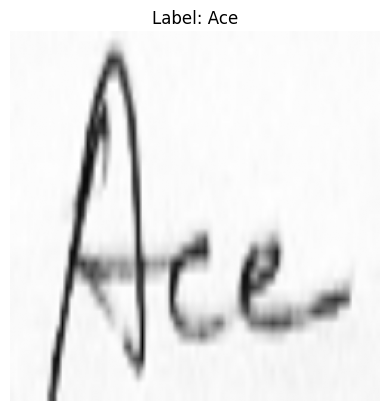

Labels successfully converted to categorical format! ✅


In [26]:

# Display an example image with its label
plt.imshow(train_images[50])
plt.title(f"Label: {train_labels[50]}")
plt.axis("off")
plt.show()

# Convert labels to categorical (if needed)
unique_labels = list(set(label for label_array in train_labels for label in label_array))
label_to_index = {label: i for i, label in enumerate(unique_labels)}

# Convert labels to indices
train_labels = np.array([label_to_index[label[0]] for label in train_labels])
test_labels = np.array([label_to_index[label[0]] for label in test_labels])
val_labels = np.array([label_to_index[label[0]] for label in val_labels])

# One-hot encode the labels
train_labels = to_categorical(train_labels, num_classes=len(unique_labels))
test_labels = to_categorical(test_labels, num_classes=len(unique_labels))
val_labels = to_categorical(val_labels, num_classes=len(unique_labels))

print("Labels successfully converted to categorical format! ✅")